#Import dependencies

In [1]:
import numpy as np
import pandas as pd
import random
from random import seed
from random import randint

## Reading DataFrame


In [3]:
pre_df = pd.read_csv('Arabic_names.csv')
pre_df

,Name,Gender
0,ابتسام,F
1,ابتهاج,F
2,ابتهال,F
3,اجتهاد,F
4,ازدهار,F
...,...,...
1400,وهبة,M
1401,ياسر,M
1402,يحيى,M
1403,يزيد,M


## Match Arabic letters
This Step to solve 2 problems in data 

First Problem:  Characters consistency 





Second Problem: Compound Names





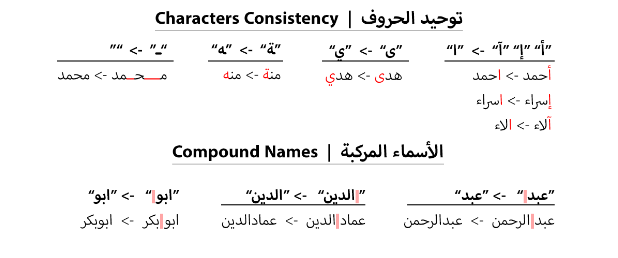

In [4]:
inconsistency_mapper = {
    "أ": "ا",
    "إ": "ا",
    "آ": "ا",
    "ة": "ه",
    "ى": "ي",
    "ـ": "",
    " الدين": "الدين",
    "عبد ": "عبد",
    "ابو ": "ابو",
    "ام ": "ام",
}

In [7]:
for k, v in inconsistency_mapper.items():
    pre_df['Name'] = pre_df['Name'].str.replace(k, v)
pre_df.head(20)

,Name,Gender
0,ابتسام,F
1,ابتهاج,F
2,ابتهال,F
3,اجتهاد,F
4,ازدهار,F
5,اعتدال,F
6,اعتماد,F
7,افتخار,F
8,افتكار,F
9,البتول,F


## splitting to Males& Females


In [ ]:
df_female=df[df['Gender']=='F']
df_female

,Name,Gender
0,ابتسام,F
1,ابتهاج,F
2,ابتهال,F
3,اجتهاد,F
4,ازدهار,F
...,...,...
547,ياسمين,F
548,يسرا,F
549,يسري,F
550,يمن,F


In [ ]:
df_male=df[df['Gender']=='M']
df_male

,Name,Gender
552,ابراهيم,M
553,اسلم,M
554,البراء,M
555,الحبيب,M
556,الخضر,M
...,...,...
1400,وهبه,M
1401,ياسر,M
1402,يحيي,M
1403,يزيد,M


In [ ]:
arr_female=df_female['Name'].to_numpy()
arr_male=df_male['Name'].to_numpy()

In [ ]:
mixed_arr=np.concatenate((arr_male, arr_female),axis=None)

## generate True Names


In [ ]:
def random_names(names, size):
    return np.random.choice(names, size=size)

In [ ]:
size=3000
df_T = pd.DataFrame(columns=['First','Middle', 'Last'])
df_T['First'] = random_names(mixed_arr, size )
df_T['Middle'] = random_names(arr_male, size)
df_T['Last'] = random_names(arr_male, size) 
df_T['Full_name'] = df_T['First'] + " " +  df_T['Middle']+" "+df_T["Last"].astype(str)
df_T


,First,Middle,Last,Full_name
0,رهام,فخري,فرحان,رهام فخري فرحان
1,محجن,عبدالرشيد,موفق,محجن عبدالرشيد موفق
2,معتوق,ادم,راشد,معتوق ادم راشد
3,اوس,رسمي,نجيب,اوس رسمي نجيب
4,ايسر,نصوح,سمعون,ايسر نصوح سمعون
...,...,...,...,...
2995,مدركه,قعقاع,معمر,مدركه قعقاع معمر
2996,عزب,ضيغم,مكين,عزب ضيغم مكين
2997,حكيم,هيثم,معاذ,حكيم هيثم معاذ
2998,صباح,وفيق,عبدالجبار,صباح وفيق عبدالجبار


In [ ]:
df_T['class']='Real_Name'
df_T

,First,Middle,Last,Full_name,class
0,رهام,فخري,فرحان,رهام فخري فرحان,T
1,محجن,عبدالرشيد,موفق,محجن عبدالرشيد موفق,T
2,معتوق,ادم,راشد,معتوق ادم راشد,T
3,اوس,رسمي,نجيب,اوس رسمي نجيب,T
4,ايسر,نصوح,سمعون,ايسر نصوح سمعون,T
...,...,...,...,...,...
2995,مدركه,قعقاع,معمر,مدركه قعقاع معمر,T
2996,عزب,ضيغم,مكين,عزب ضيغم مكين,T
2997,حكيم,هيثم,معاذ,حكيم هيثم معاذ,T
2998,صباح,وفيق,عبدالجبار,صباح وفيق عبدالجبار,T


In [ ]:
df_T=df_T[['Full_name','class']]
df_T

,Full_name,class
0,رهام فخري فرحان,T
1,محجن عبدالرشيد موفق,T
2,معتوق ادم راشد,T
3,اوس رسمي نجيب,T
4,ايسر نصوح سمعون,T
...,...,...
2995,مدركه قعقاع معمر,T
2996,عزب ضيغم مكين,T
2997,حكيم هيثم معاذ,T
2998,صباح وفيق عبدالجبار,T


##  generate Garbage Names

In [ ]:
### garbage Data
def garbage_Data(name):
  #seed(1)
  LETTERS = u'ابتةثجحخدذرزسشصضطظعغفقكلمنهويءآأؤإئ'
  arr_num=[]
  arr_letter=[]
  x=randint(1, len(name))
  for _ in range(x):
    value = randint(1, len(name))
    arr_num.append(value)
  for _ in range(x):
    letter=random.choice(LETTERS)
    arr_letter.append(letter)
  for _ in range(len(arr_num)):
    name = name[:arr_num[_]] + arr_letter[_] + name[arr_num[_] + 1:]
  return name,'F'

In [ ]:
for i in df_T['Full_name']:
  df_T.loc[len(df_T.index)]=garbage_Data(i)
df_T
  

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Full_name,class
0,رهام فخري فرحان,T
1,محجن عبدالرشيد موفق,T
2,معتوق ادم راشد,T
3,اوس رسمي نجيب,T
4,ايسر نصوح سمعون,T
...,...,...
5995,مدأنؤقضعقكغيمعضرظ,F
5996,عؤظفضءعم مءيض,F
5997,حءيضثهيثص معاو,F
5998,صبضح ءءيق عدوكلابإشأ,F


## final data

In [ ]:
df_final = df_T.sample(frac=1).reset_index()

In [ ]:
df_final.to_csv('final.csv')